# Representative-based / Prototype-based Clustering

---
Members
1. Kanyaluck Chimchome (64070501003)
2. Boonyarit Samran (64070501028)
3. Warisara Patib (64070501044)
4. Chanidapa Chanama (64070501090)
5. Nontawat Kunlayawuttipong (64070501093)
6. Nuttanon Yolnawa (64070507205)

**Load necessary packages and apply custom configurations**

In [89]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import sklearn as sk

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)
print('Sklearn version', sk.__version__)

[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

Numpy version 1.26.0
Pandas version 2.1.1
Seaborn version 0.12.2
Statsmodels version 0.14.0
Sklearn version 1.3.1


In [90]:
font_size=13
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,4),
          'axes.labelsize': font_size,
          'axes.titlesize': font_size,
          'xtick.labelsize': font_size*0.8,
          'ytick.labelsize': font_size*0.8,
          'axes.titlepad': 25}
plt.rcParams.update(params)

## K-Means clustering

### Load the data

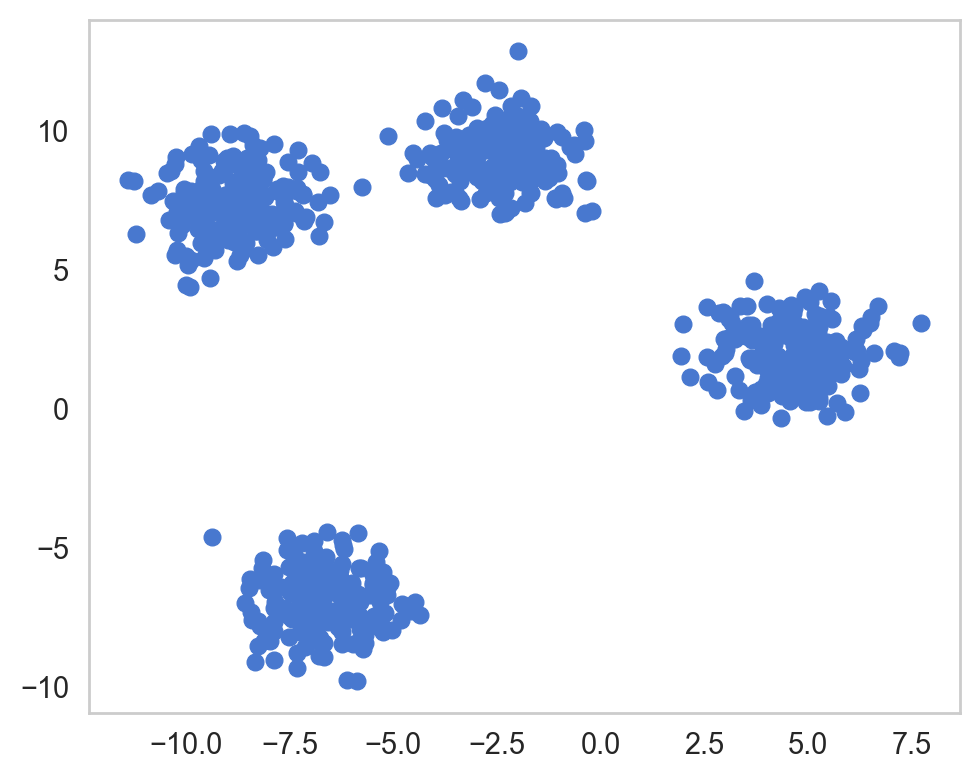

In [91]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=800, centers=4, random_state=42)

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1]);
plt.tight_layout();

### Fit K-means model

<font color='blue'> Import the KMeans function, specify the number of clusters $K$ and fit the K-means model.  
    
Run ```pip install --upgrade threadpoolctl==3.1.0``` if fit() generates errors.

In [92]:
from sklearn.cluster import KMeans

# set number of clusters
K = 6

# fit the model
kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(X)

<font color='blue'>Get the cluster labels, sum of squared distance, and cluster centroids

In [93]:
# clutter labels
labels = kmeans.predict(X)

# sum of squares distances
sse = kmeans.inertia_

# centroids value
centroids = kmeans.cluster_centers_

In [94]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 1270.283

Centroids : 
 [[-6.565 -7.778]
 [-2.501  9.053]
 [ 4.592  1.95 ]
 [-8.709  8.273]
 [-8.912  6.539]
 [-6.772 -6.065]]


### Visualize the clustering 

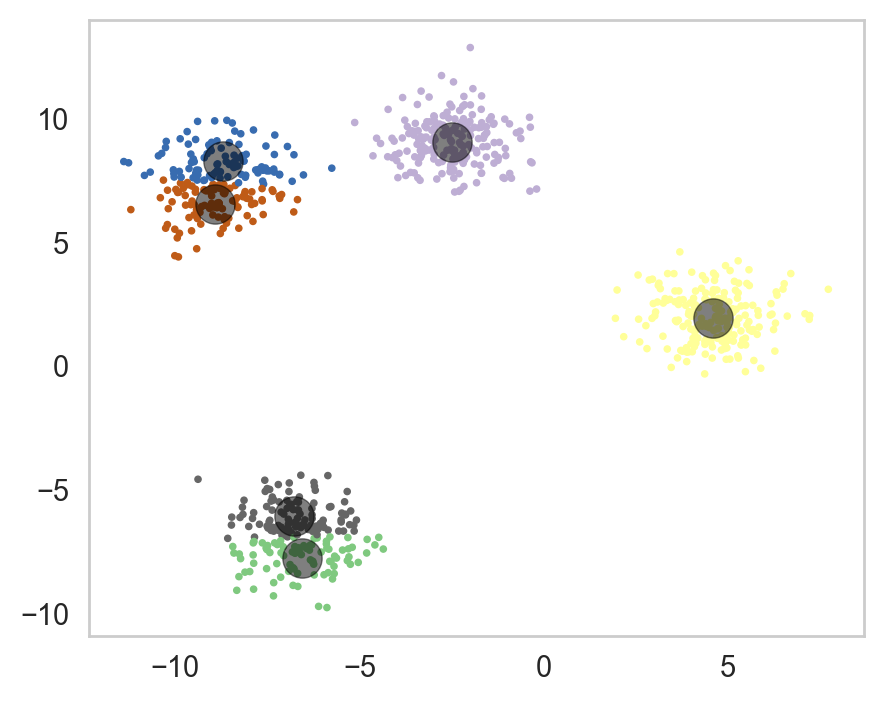

In [95]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Elbow method

<font color='blue'>Determine SSE for different number of clusters $K$

In [96]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_

<font color='blue'>Plot SSE vs. the number of cluster $K$

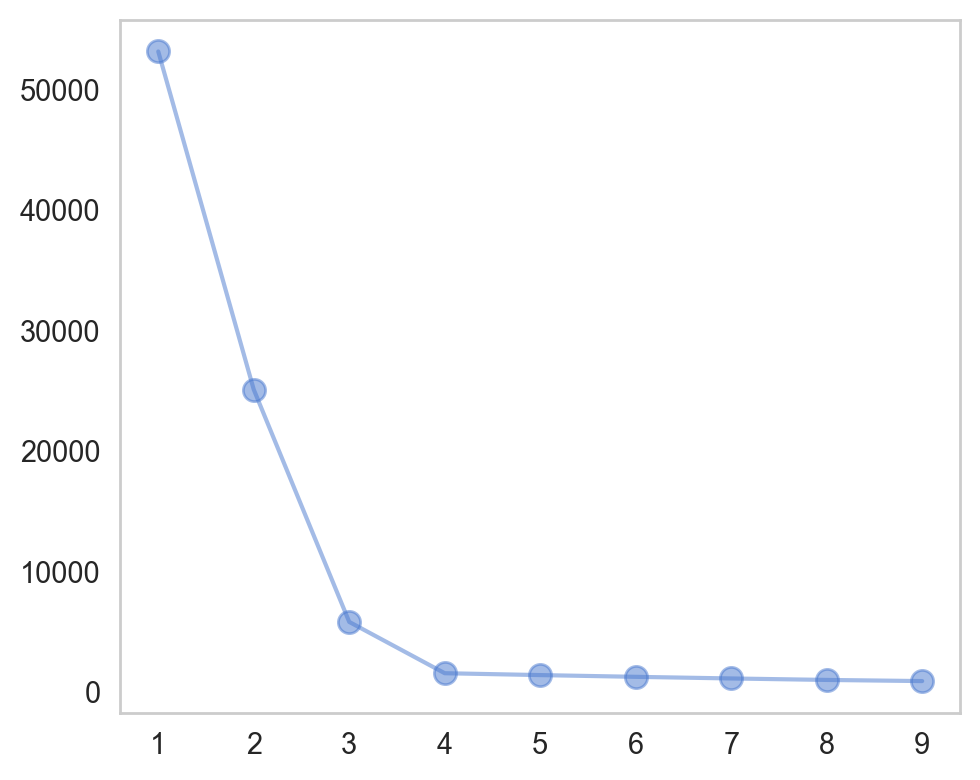

In [97]:
_, ax = plt.subplots(figsize=(5, 4))
ax.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8)
plt.tight_layout()

### Other Clustering Indices

<font color='blue'>Silhouette coefficient

In [98]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)


0.5563484680017222

<font color='blue'>Calinski Harabasz Index

In [99]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, labels)

6488.832966078819

## <font color='orange'>In-class assignment : K-means Clustering<font>

In [100]:
cluster_df1 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset1')

In [101]:
cluster_df2 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset2')

In [102]:
cluster_df3 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset3')

In [103]:
cluster_df4 = pd.read_excel('data/clustering-basics.xlsx', sheet_name='Dataset4')

---

# Dataset 1

In [104]:
from sklearn.cluster import KMeans

# set number of clusters
for K in range(3, 7):
    # fit the model
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(cluster_df1)

    # clutter labels
    labels = kmeans.predict(cluster_df1)

    print("silhouette_score" , K, ":", silhouette_score(cluster_df1, labels))

silhouette_score 3 : 0.6253962082504931
silhouette_score 4 : 0.6468243394679842
silhouette_score 5 : 0.5304334845572561
silhouette_score 6 : 0.4266659985854214


So we select K = 4 because it has the greatest silhouette_score.

In [105]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit(cluster_df1)

# clutter labels
labels = kmeans.predict(cluster_df1)

# sum of squares distances
sse = kmeans.inertia_

# centroids value
centroids = kmeans.cluster_centers_

In [106]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 184.324

Centroids : 
 [[ 1.004  1.011]
 [-1.036 -1.004]
 [ 1.071 -0.979]
 [ 9.972  4.067]]


In [107]:
cluster_df1.X1

0     -1.180026
1     -1.488851
2     -0.828153
3      0.792955
4     -1.988658
         ...   
595    0.939286
596   -1.042812
597   -0.342013
598    1.018229
599   -1.622652
Name: X1, Length: 600, dtype: float64

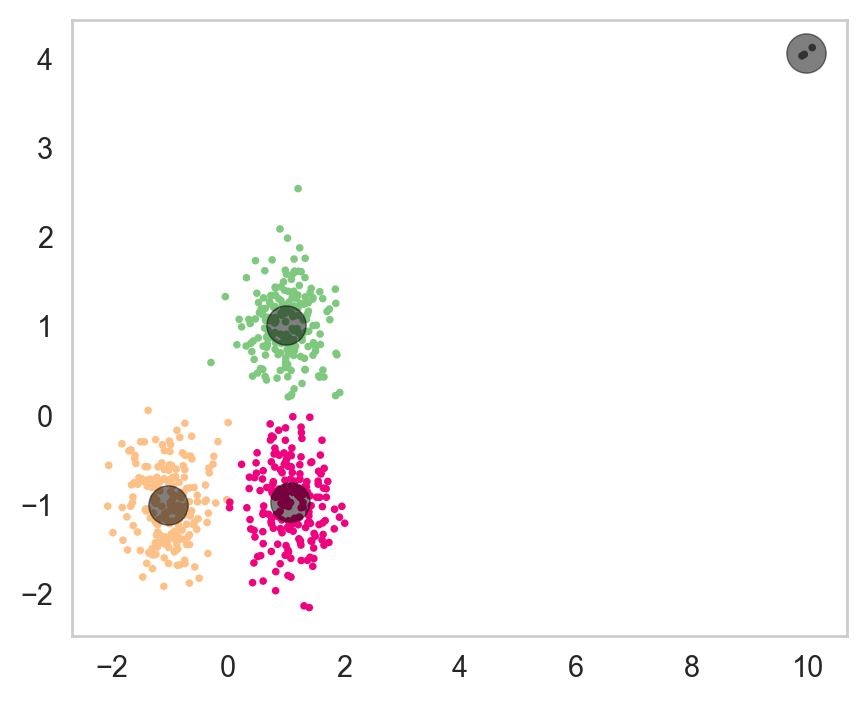

In [108]:
import matplotlib.pyplot as plt

plt.scatter(cluster_df1.X1, cluster_df1.X2, c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Dataset 2

In [109]:
from sklearn.cluster import KMeans

# set number of clusters
for K in range(3, 7):
    # fit the model
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(cluster_df2)

    # clutter labels
    labels = kmeans.predict(cluster_df2)

    print("silhouette_score" , K, ":", silhouette_score(cluster_df2, labels))

silhouette_score 3 : 0.38649280273009534
silhouette_score 4 : 0.4733823300962655
silhouette_score 5 : 0.5200312622205953
silhouette_score 6 : 0.53745062219498


So we select K = 6 because it has the greatest silhouette_score.

In [127]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42).fit(cluster_df2)

# clutter labels
labels = kmeans.predict(cluster_df2)

# sum of squares distances
sse = kmeans.inertia_

# centroids value
centroids = kmeans.cluster_centers_

In [128]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 94.963

Centroids : 
 [[ 8.620e-01 -3.946e-01]
 [-1.173e-03  6.132e-04]
 [-1.105e-01 -9.244e-01]
 [-4.757e-01  8.068e-01]
 [ 6.241e-01  7.072e-01]
 [-9.150e-01 -1.835e-01]]


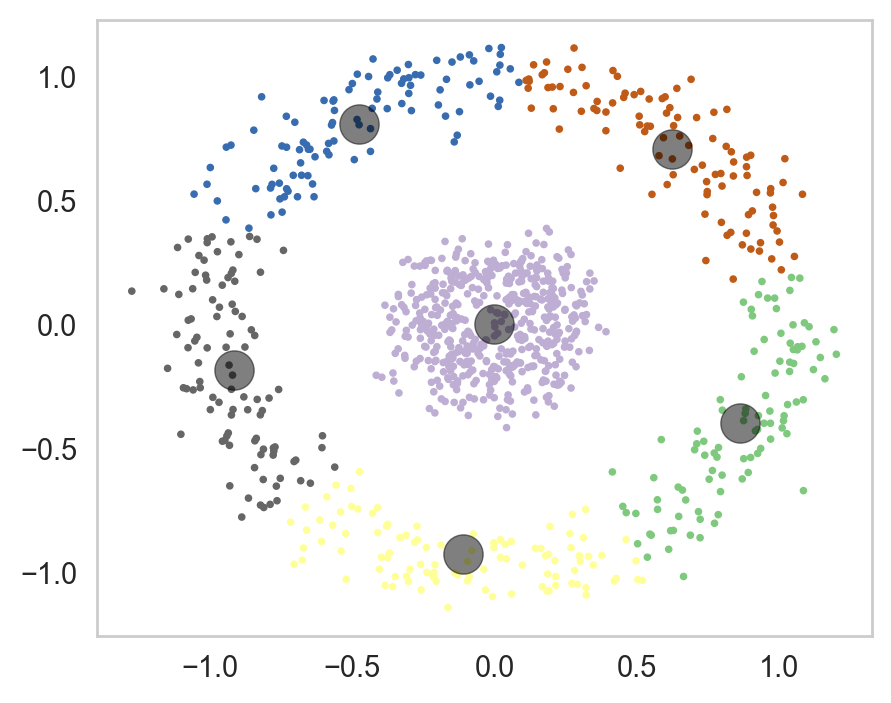

In [129]:
import matplotlib.pyplot as plt

plt.scatter(cluster_df2.X1, cluster_df2.X2, c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Dataset 3

In [113]:
from sklearn.cluster import KMeans

# set number of clusters
for K in range(3, 7):
    # fit the model
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(cluster_df3)

    # clutter labels
    labels = kmeans.predict(cluster_df3)

    print("silhouette_score" , K, ":", silhouette_score(cluster_df3, labels))

silhouette_score 3 : 0.42794382424161076
silhouette_score 4 : 0.4595575665755674


silhouette_score 5 : 0.48938151692903875
silhouette_score 6 : 0.5252213125166532


So we select K = 6 because it has the greatest silhouette_score.

In [114]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42).fit(cluster_df3)

# clutter labels
labels = kmeans.predict(cluster_df3)

# sum of squares distances
sse = kmeans.inertia_

# centroids value
centroids = kmeans.cluster_centers_

In [115]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 44.814

Centroids : 
 [[ 0.795  0.513]
 [-0.85   0.453]
 [ 1.028 -0.462]
 [-0.069  0.947]
 [ 1.836  0.032]
 [ 0.205 -0.018]]


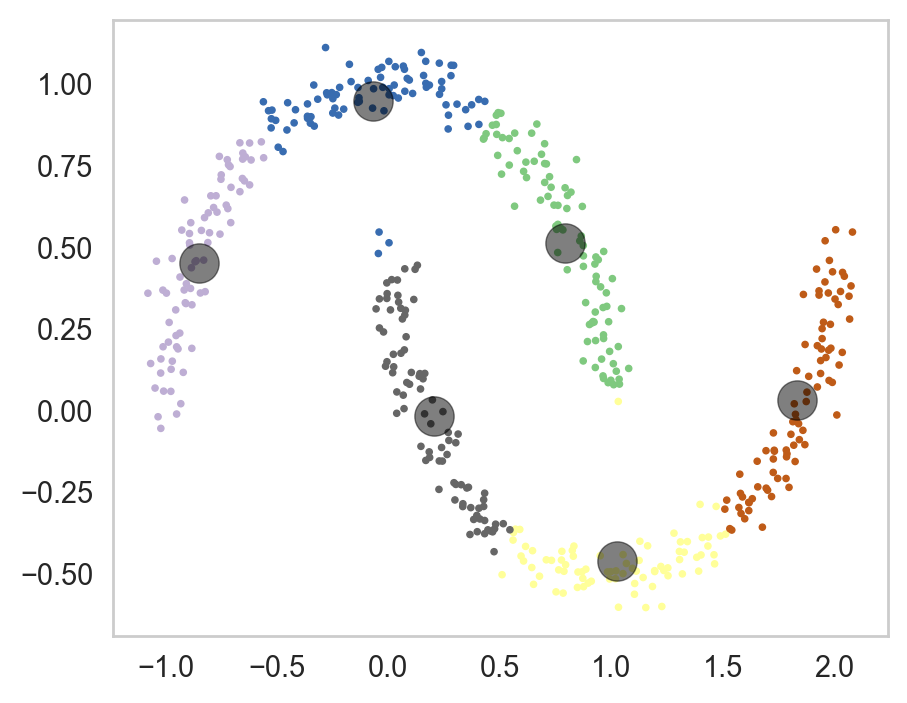

In [116]:
import matplotlib.pyplot as plt

plt.scatter(cluster_df3.X1, cluster_df3.X2, c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Dataset 4

In [117]:
from sklearn.cluster import KMeans

# set number of clusters
for K in range(2, 7):
    # fit the model
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(cluster_df4)

    # clutter labels
    labels = kmeans.predict(cluster_df4)

    print("silhouette_score" , K, ":", silhouette_score(cluster_df4, labels))

silhouette_score 2 : 0.4270730877908618
silhouette_score 3 : 0.48885199741219676


silhouette_score 4 : 0.46789977106749947
silhouette_score 5 : 0.45303338914344127
silhouette_score 6 : 0.45139350742737144


So we select K = 3 because it has the greatest silhouette_score.

In [118]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(cluster_df4)

# clutter labels
labels = kmeans.predict(cluster_df4)

# sum of squares distances
sse = kmeans.inertia_

# centroids value
centroids = kmeans.cluster_centers_

In [119]:
np.set_printoptions(precision=3)
print(f"Sum of squared errors : {sse:.3f}")
print(f"\nCentroids : \n {centroids}") 

Sum of squared errors : 806.607

Centroids : 
 [[ 0.924  0.119]
 [ 0.728 -2.026]
 [-1.218 -1.3  ]]


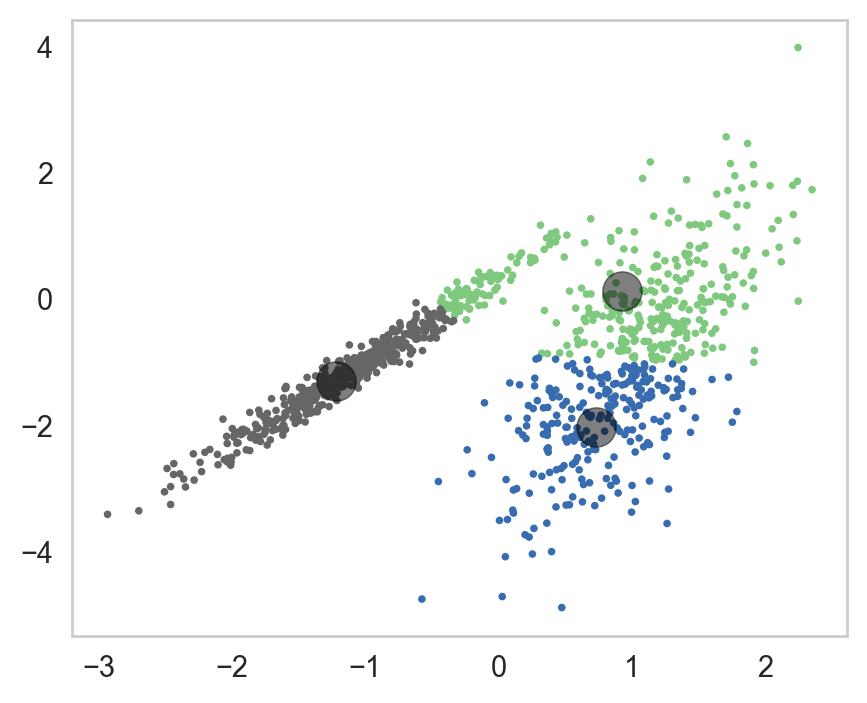

In [120]:
import matplotlib.pyplot as plt

plt.scatter(cluster_df4.X1, cluster_df4.X2, c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);